In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp, solve_ivp

# TRY 1
using the p endpoints to account for the cost

       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x28b1ed800>
             p: None
             y: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 ...
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]]
            yp: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 ...
                 [-1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00]
                 [-1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00]]
 rms_residuals: [ 1.472e+00  1.472e+00 ...  1.472e+00  1.472e+00]
         niter: 1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

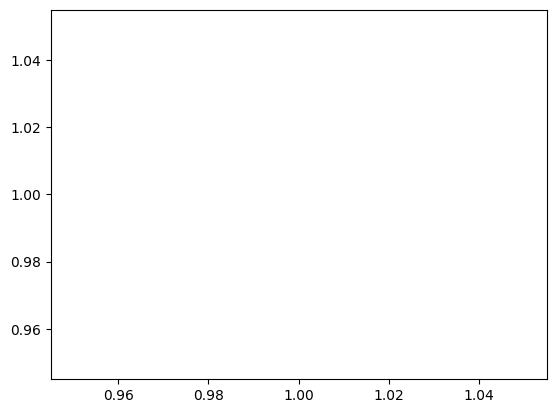

In [102]:
'''
Find the optimal path for the fixed time horizon problem
'''
# initialize vals
t0 = 0
Sx = 0
Sy = .5
c = 1
sigma = 1
Pu = 9
Pl = 7
dt = .01

    # define ode func
def ode(t,y):
    return np.array([y[2], 
                     y[3], 
                     np.zeros_like(y[0]),
                     -9.8+y[6],
                     np.zeros_like(y[0]), 
                     np.zeros_like(y[0]), 
                     -y[4],
                     -y[5]])

# define boundary conditions
def bcs(ya, yb):
    endpt = np.exp(-(yb[1]-(Pu + Pl)/2)**2/sigma**2) * (-2*(yb[1]-(Pu + Pl)/2)/sigma**2)
    # endpt = 7

    return np.array([ya[0] - Sx, ya[1] - Sy, ya[2] - c, ya[3],
                     yb[0]-1, yb[5] - endpt, yb[2] - c, yb[7]])   

# initial guess 
x = np.linspace(t0,1,100)
y_guess = np.ones((8, 100))

# solve
# sol = solve_ivp(ode, x, y_guess)
sol = solve_bvp(ode, bcs, x, y_guess, max_nodes=30000)

print(sol)

plt.plot(sol.y[0], sol.y[1])

print(sol.y[0])
print(sol.y[1])
plt.show()

# TRY 2 
Leveraging the obstacle avoidance lab to go through the center of the 'obstacle'

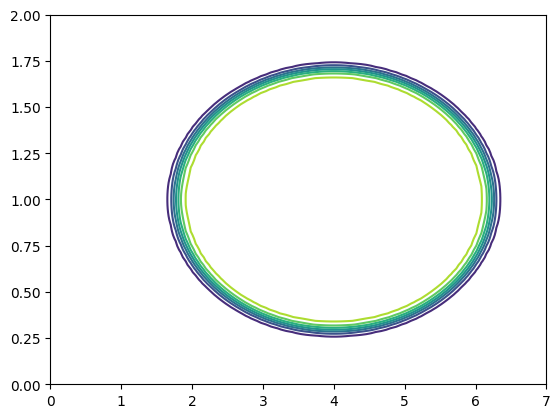

In [5]:
# creating obstacles
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

# plot obstacle
t0,tf = 0,20
c = (4,1)
r = (5,0.5)
W1, W2 = 3, 70
X,Y = np.meshgrid(np.linspace(0,7,100), np.linspace(0,2,100))
obs = obstacle(X,Y,W1,r,c)
plt.contour(X,Y, obs)
plt.show()

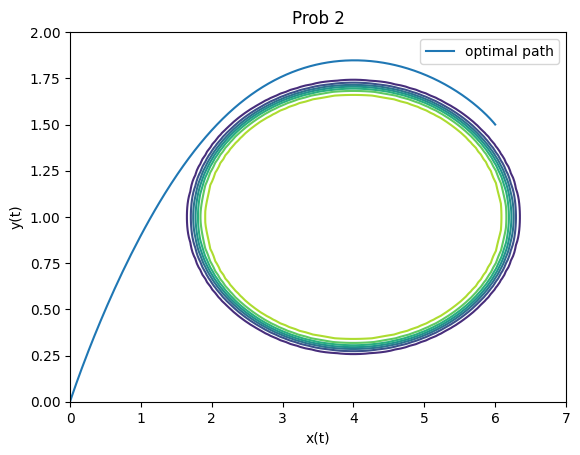

In [6]:
# original code 
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    # initialize vals
    t0,tf = 0,20
    c = (4,1)
    r = (5,0.5)
    W1, W2 = 3, 70

     # define ode func
    def ode(x,y):
        return np.array([y[2], y[3], y[6]/2/W2, y[7]/2/W2,
                         obstacle_dx(y[0], y[1], W1, r, c),
                         obstacle_dy(y[0], y[1], W1, r, c),
                         -y[4], -y[5]])
    
    # define boundary conditions
    def bcs(xa, xb):
        return np.array([xa[0]-6, xa[1]-1.5, xa[2], xa[3], 
                         xb[0], xb[1], xb[2], xb[3]])   

    # initial guess 
    x = np.linspace(t0,tf,100)
    y_guess = np.ones((8,100))

    # solve
    sol = solve_bvp(ode, bcs, x, y_guess, max_nodes=30000)

    # plot obstacle
    X,Y = np.meshgrid(np.linspace(0,7,100), np.linspace(0,2,100))
    obs = obstacle(X,Y,W1,r,c)
    plt.contour(X,Y, obs)
    # plot solution
    plt.plot(sol.y[0], sol.y[1], label='optimal path')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.legend()
    plt.title('Prob 2')
    plt.show()

prob2()

       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [ 0.000e+00  2.020e-01 ...  1.980e+01  2.000e+01]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x17fee2430>
             p: None
             y: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 ...
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]]
            yp: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 ...
                 [-1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00]
                 [-1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00]]
 rms_residuals: [ 1.155e+00  1.155e+00 ...  1.155e+00  1.155e+00]
         niter: 1


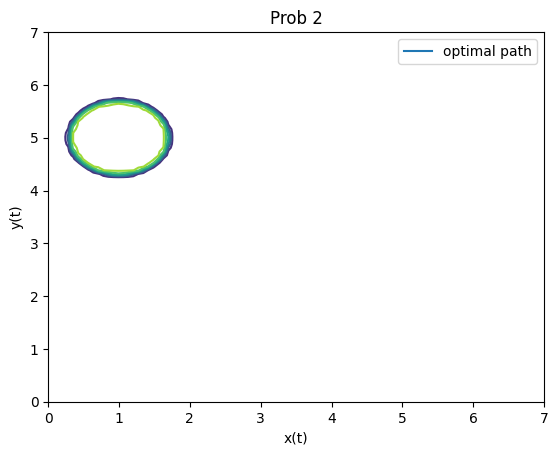

In [103]:
# testing out for our case
# initialize vals
t0,tf = 0,20
c = (1,5)
r = (.5,0.5)
W1, W2 = 50, 70

# initialize vals
# t0 = 0
Sx = 0
Sy = 3
const = 1
sigma = 1
Pu = 9
Pl = 7
dt = .01
gravity = -.5

    # define ode func
def ode(x,y):
    return np.array([y[2], 
                     y[3],
                     np.zeros_like(y[0]),
                     y[6] + gravity, 
                    -obstacle_dx(y[0], y[1], W1, r, c),
                    -obstacle_dy(y[0], y[1], W1, r, c),
                    -y[4], 
                    -y[5]])

# define boundary conditions
def bcs(xa, xb):
    return np.array([xa[0], xa[1]-Sy, xa[2]-const, xa[3], 
                        xb[0]-1, xb[2]-const, xb[5], xb[7]])   

# initial guess 
x = np.linspace(t0,tf,100)
y_guess = np.ones((8,100))

# solve
sol = solve_bvp(ode, bcs, x, y_guess, max_nodes=30000)
print(sol)

# plot obstacle
X,Y = np.meshgrid(np.linspace(0,7,100), np.linspace(0,7,100))
obs = obstacle(X,Y,W1,r,c)
plt.contour(X,Y, obs)
# plot solution
plt.plot(sol.y[0], sol.y[1], label='optimal path')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Prob 2')
# plt.ylim(0,7)
plt.show()

